In [2]:
import sys
import os

# Ajoute le chemin du dossier racine (le dossier parent de notebooks/)
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_path not in sys.path:
    sys.path.append(project_path)


                  time  price     action  soc_before  soc_after  energy  \
0  2024-01-01 00:00:00     20     charge    0.900000   0.900000     0.0   
1  2024-01-01 01:00:00     18     charge    0.900000   0.900000     0.0   
2  2024-01-01 02:00:00     25       idle    0.900000   0.900000     0.0   
3  2024-01-01 03:00:00     30       idle    0.900000   0.900000     0.0   
4  2024-01-01 04:00:00     35       idle    0.900000   0.900000     0.0   
5  2024-01-01 05:00:00     50       idle    0.900000   0.900000     0.0   
6  2024-01-01 06:00:00     65       idle    0.900000   0.900000     0.0   
7  2024-01-01 07:00:00     85  discharge    0.900000   0.344444    50.0   
8  2024-01-01 08:00:00    100  discharge    0.344444   0.100000    22.0   
9  2024-01-01 09:00:00     60       idle    0.100000   0.100000     0.0   
10 2024-01-01 10:00:00     45       idle    0.100000   0.100000     0.0   
11 2024-01-01 11:00:00     30       idle    0.100000   0.100000     0.0   
12 2024-01-01 12:00:00   

C:\Users\ilyas\AppData\Local\Temp\ipykernel_13672\1695792125.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range("2024-01-01", periods=13, freq="H")


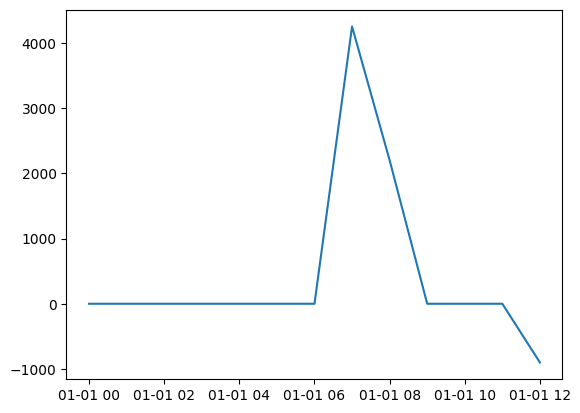

In [ ]:
import pandas as pd
from src.battery_model import Battery
from src.strategy import simple_threshold_strategy
from src.simulator import run_simulation
import matplotlib.pyplot as plt

# Exemple de données fictives
prices = pd.Series(
    [20, 18, 25, 30, 35, 50, 65, 85, 100, 60, 45, 30, 20],
    index=pd.date_range("2024-01-01", periods=13, freq="H")
)

batt = Battery(capacity_kwh=100, power_kw=50, efficiency=0.9)
results = run_simulation(prices, batt)
print(results)

plt.plot(results.time, results.revenue)


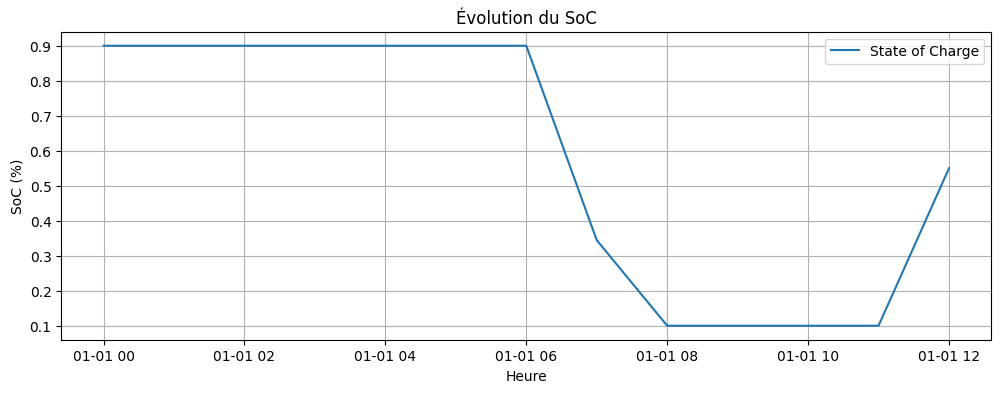

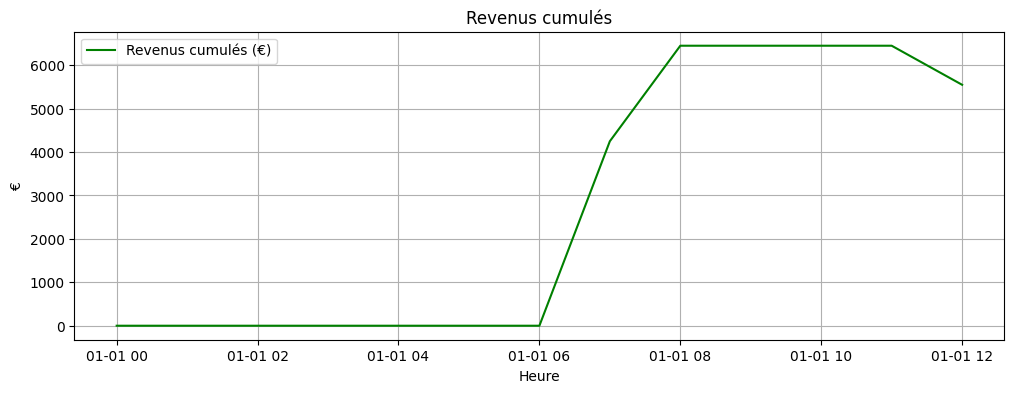

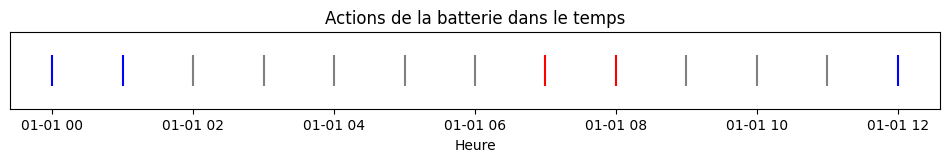

In [10]:
import matplotlib.pyplot as plt

# Courbe de SoC
plt.figure(figsize=(12, 4))
plt.plot(results['time'], results['soc_after'], label='State of Charge')
plt.ylabel('SoC (%)')
plt.xlabel('Heure')
plt.title('Évolution du SoC')
plt.grid()
plt.legend()
plt.show()

# Revenus cumulés
results['cumulative_revenue'] = results['revenue'].cumsum()
plt.figure(figsize=(12, 4))
plt.plot(results['time'], results['cumulative_revenue'], label='Revenus cumulés (€)', color='green')
plt.ylabel('€')
plt.xlabel('Heure')
plt.title('Revenus cumulés')
plt.grid()
plt.legend()
plt.show()

# Action heatmap
color_map = {'charge': 'blue', 'discharge': 'red', 'idle': 'grey'}
colors = results['action'].map(color_map)
plt.figure(figsize=(12, 1))
plt.scatter(results['time'], [1]*len(results), c=colors, marker='|', s=500)
plt.title("Actions de la batterie dans le temps")
plt.yticks([])
plt.xlabel("Heure")
plt.show()
